In [1]:
# Cell 1: Import the necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [2]:
# Cell 2: Load and Normalize the CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)

# Print shapes of the training and test data
print('Training data shape:', x_train.shape)
print('Test data shape:', x_test.shape)

170498071/170498071 [==============================] - 4s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [9]:
# Cell 3: Define the CNN Model Architecture within a function
def create_model(n_filters=32, dropout_rate=0.25, dense_size=512):
    model = Sequential([
        Conv2D(n_filters, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
        Conv2D(n_filters, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Dropout(dropout_rate),

        Conv2D(n_filters * 2, (3, 3), padding='same', activation='relu'),
        Conv2D(n_filters * 2, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Dropout(dropout_rate),

        Flatten(),
        Dense(dense_size, activation='relu'),
        Dropout(dropout_rate),
        Dense(10, activation='softmax')
    ])
    return model

In [10]:
# Cell 4: Define a Training Function
def compile_and_train(model, learning_rate=0.001, batch_size=64, epochs=15):
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train_one_hot, batch_size=batch_size, epochs=epochs,
                        validation_data=(x_test, y_test_one_hot))
    return history

In [12]:
batch_sizes = [32, 64, 128]
histories = []
accuracies = []

for batch_size in batch_sizes:
    print(f"\nTraining with batch size: {batch_size}")
    history, test_acc = train_and_evaluate(batch_size=batch_size)
    histories.append(history)
    accuracies.append(test_acc)


Training with batch size: 32
Epoch 1/15
1563/1563 [==============================] - 259s 165ms/step - loss: 1.4779 - accuracy: 0.4626 - val_loss: 1.1454 - val_accuracy: 0.5917
Epoch 2/15
1563/1563 [==============================] - 246s 158ms/step - loss: 1.0608 - accuracy: 0.6207 - val_loss: 0.9483 - val_accuracy: 0.6646
Epoch 3/15
1563/1563 [==============================] - 249s 159ms/step - loss: 0.8905 - accuracy: 0.6878 - val_loss: 0.8532 - val_accuracy: 0.7050
Epoch 4/15
1563/1563 [==============================] - 251s 161ms/step - loss: 0.7949 - accuracy: 0.7221 - val_loss: 0.7404 - val_accuracy: 0.7413
Epoch 5/15
1563/1563 [==============================] - 240s 153ms/step - loss: 0.7229 - accuracy: 0.7458 - val_loss: 0.7325 - val_accuracy: 0.7408
Epoch 6/15
1563/1563 [==============================] - 250s 160ms/step - loss: 0.6705 - accuracy: 0.7660 - val_loss: 0.7169 - val_accuracy: 0.7492
Epoch 7/15
1563/1563 [==============================] - 238s 152ms/step - loss: 0.

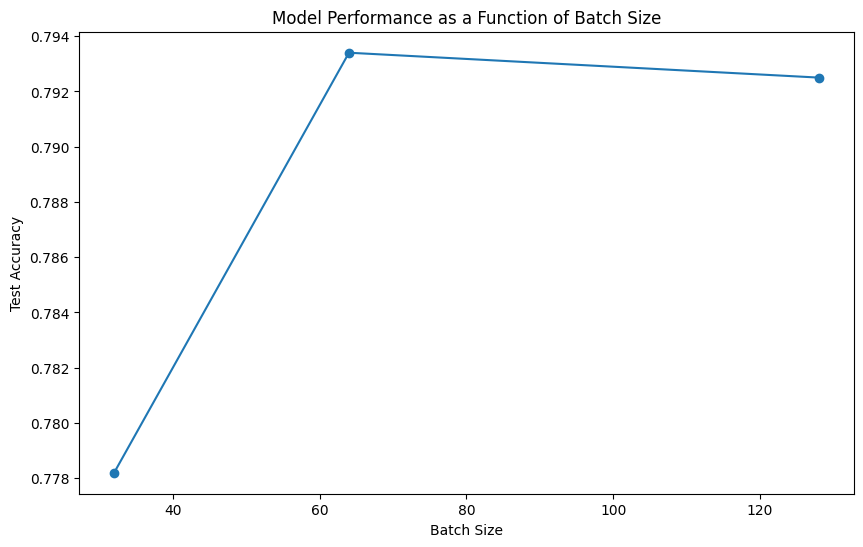

In [13]:
# Cell 6: Plot the Performance as a Function of Batch Size
plt.figure(figsize=(10, 6))
plt.plot(batch_sizes, accuracies, marker='o', linestyle='-')
plt.title('Model Performance as a Function of Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Test Accuracy')
plt.show()
